In [1]:
import numpy as np
import pylab as py

%pylab inline

Populating the interactive namespace from numpy and matplotlib


 $$I \dfrac{d^2 \theta}{dt^2} = \Gamma_\textrm{gravity}+\Gamma_\textrm{spring} $$


$$  \Gamma_\textrm{res_m} = -m g l sin(\theta) $$

$$  F_\textrm{spring} = -k \vec{ex}$$

$$ ex = (l_\textrm{2} sin(\theta_\textrm{2}) - l_\textrm{1} sin(\theta_\textrm{1})+d)  \hat{x} + ((l_\textrm{1} cos(\theta_\textrm{1})-l_\textrm{2} cos(\theta_\textrm{2})) \hat{y} $$

$$ ex_\textrm{o} = d \hat{x}+(l_\textrm{1}-l_\textrm{2})\hat{y} $$

$$ \vec{E}_x = |\vec{ex}-\vec{ex_\textrm{o}}| \hat{ex} $$

$$ \Gamma_\textrm{_m1} = - mgl_\textrm{1}sin(\theta_\textrm{1})+\vec{r_\textrm{1}} \times\ k \vec{Ex}$$

$$ \Gamma_\textrm{_m2} = - mgl_\textrm{2}sin(\theta_\textrm{2})-\vec{r_\textrm{2}} \times\ k \vec{Ex}$$


In [39]:
#                       ------------------ COUPLED PENDULUM -----------------


class coupled_pend:
    def __init__(self,g=9.8,l1=1,l2=1,m1=1,m2=1,k=5,I=3,d=2,f1=0,f2=0):
        '''
        Inputs:
        Only SI units are used.
        
        Symbol  Default value   Description
        g       9.8             Acceleration due to gravity
        l1      1               lenght of the pendullum 1
        l2      1               lenght of the pendullum 2
        m1      1               mass of the bob 1
        m2      1               mass of the bob 2
        k       5               spring constant of the spring
        d       2               distance between the two pendullum
        f1      0               
        '''
        
        (self.theta1,self.theta2) = (0,0)
        (self.w1,self.w2) = (0,0)
        (self.l1,self.l2) = (l2,l1)
        (self.m1,self.m2) = (m2,m1)
        
        self.d = d
        self.g = g
        self.k = k
        self.I = I
        
    
    def extension(self,l1,l2,theta1,theta2):
        exo = np.array([self.d,(l1-l2)])
        ex = np.array([l2*np.sin(theta2)-l1*np.sin(theta1)+self.d,l1*np.cos(theta1)-l2*np.cos(theta2)])
        exo_mod = np.linalg.norm(exo,axis=0)
        ex_mod = np.linalg.norm(ex,axis=0)
        Ex = ex_mod-exo_mod
        ex_cap = ex/ex_mod
        def heavy_theta():
            if(Ex<=0):
                return 0
            else:
                return 1
        exten = heavy_theta()*Ex*ex_cap
        return exten
    
    def Torque(self,r,ex,m,l,theta):
        T_gravity = -m*self.g*l*np.sin(theta)
        T_spring = r[0]*self.k*ex[1]-r[1]*self.k*ex[0]
        return T_spring+T_gravity
        
    def w_fun1(self):
        r1 = np.array([self.l1*np.sin(self.theta1),-self.l1*np.cos(self.theta1)])
        ex = self.extension(self.l1,self.l2,self.theta1,self.theta2)
        torque = self.Torque(r1,ex,self.m1,self.l1,self.theta1)
        return (torque)/self.I
    
    def w_fun2(self):
        r2 = np.array([self.l2*np.sin(self.theta2),-self.l2*np.cos(self.theta2)])
        ex = self.extension(self.l1,self.l2,self.theta1,self.theta2)
        torque = self.Torque(r2,-ex,self.m2,self.l2,self.theta2)
        return (torque)/self.I
    
    def t_fun1(self):
        return self.w1
    
    def t_fun2(self):
        return self.w2
    

pendula = coupled_pend()

In [40]:
pendula.extension(1,1,np.pi/6,0)

array([-0.,  0.])

In [41]:
help(coupled_pend)

Help on class coupled_pend in module __main__:

class coupled_pend(builtins.object)
 |  Methods defined here:
 |  
 |  Torque(self, r, ex, m, l, theta)
 |  
 |  __init__(self, g=9.8, l1=1, l2=1, m1=1, m2=1, k=5, I=3, d=2)
 |      Inputs:
 |      Only SI units are used.
 |      
 |      Symbol  Default value   Description
 |      g       9.8             Acceleration due to gravity
 |      l1      1               lenght of the pendullum 1
 |      l2      1               lenght of the pendullum 2
 |      m1      1               mass of the bob 1
 |      m2      1               mass of the bob 2
 |      k       5               spring constant of the spring
 |      d       2               distance between the two pendullum
 |  
 |  extension(self, l1, l2, theta1, theta2)
 |  
 |  t_fun1(self)
 |  
 |  t_fun2(self)
 |  
 |  w_fun1(self)
 |  
 |  w_fun2(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |

In [42]:
pendula = coupled_pend()

def k_loop1(t,theta1,theta2,w1,w2):
    for fun in [pendula.w_fun1, pendula.w_fun2, pendula.t_fun1, pendula.t_fun2]:
        # returns k1w and k1t for ti,wi,thetai
        pendula.theta1 = theta1
        pendula.theta2 = theta2
        pendula.w1 = w1
        pendula.w2 = w2
        yield fun()


def RK4_loop1(t,h,theta1,theta2,w1,w2):
    l=1
    while(l<=len(t)):
        k1 = [val for val in k_loop1(t,      theta1,            theta2,            w1,            w2            )]
        k2 = [val for val in k_loop1(t+0.5*h,theta1+0.5*h*k1[2],theta2+0.5*h*k1[3],w1+0.5*h*k1[0],w2+0.5*h*k1[1])]
        k3 = [val for val in k_loop1(t+0.5*h,theta1+0.5*h*k2[2],theta2+0.5*h*k2[3],w1+0.5*h*k2[0],w2+0.5*h*k2[1])]
        k4 = [val for val in k_loop1(t+h,    theta1+h*k3[2],    theta2+h*k3[3],    w1+h*k3[0],    w2+h*k3[1]    )]
        theta1 = theta1+(k1[2]+2*k2[2]+2*k3[2]+k4[2])*h/6
        theta2 = theta2+(k1[3]+2*k2[3]+2*k3[3]+k4[3])*h/6
        w1     = w1+(k1[0]+2*k2[0]+2*k3[0]+k4[0])*h/6
        w2     = w2+(k1[1]+2*k2[1]+2*k3[1]+k4[1])*h/6
        l=l+1
        yield theta1,theta2,w1,w2
        

In [43]:
t_start = 0
t_end = 25
h = 0.01

t = np.arange(t_start,t_end,h)

# initial values of the system

theta1 = 0*np.pi/180.0
theta2 = -5*np.pi/180.0
w1 = 0
w2 = 0
pendula.l1 = 0.5

In [44]:
D = RK4_loop1(t,h,theta1,theta2,w1,w2)
Ret = [th for th in D]

Ret = np.array(Ret).T


T1 = Ret[0]
T2 = Ret[1]
W1 = Ret[2]
W2 = Ret[3]

In [45]:
m1 = pendula.m1
m2 = pendula.m2
l1  = pendula.l1
l2  = pendula.l2
g  = pendula.g
k  = pendula.k
I = pendula.I

pen_pot = m1*g*(l1-l1*np.cos(T1))+m2*g*(l2-l2*np.cos(T2))
Ex = [pendula.extension(l1,l2,T1[i],T2[i]) for i in range(len(T1))]
ex_mod = np.linalg.norm(np.array(Ex).T,axis=0)

spr_pot = 0.5*k*np.array(ex_mod)**2

Pot = pen_pot+spr_pot
Kin = 0.5*I*W1**2+0.5*I*W2**2

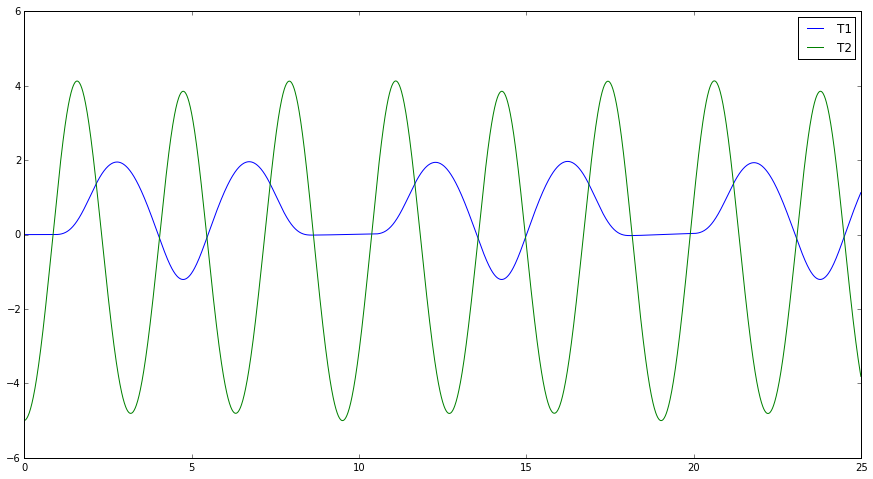

In [46]:
py.subplots(figsize=(15,8))
py.plot(t,np.array(T1)*180/np.pi,t,np.array(T2)*180/np.pi)
py.legend(['T1','T2'])
py.show()

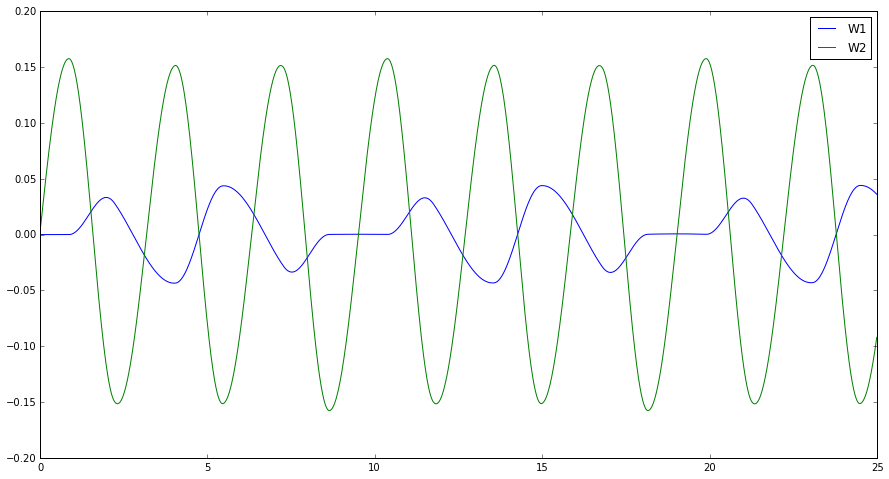

In [47]:
py.subplots(figsize=(15,8))
py.plot(t,W1,t,W2)
py.legend(['W1','W2'])
py.show()

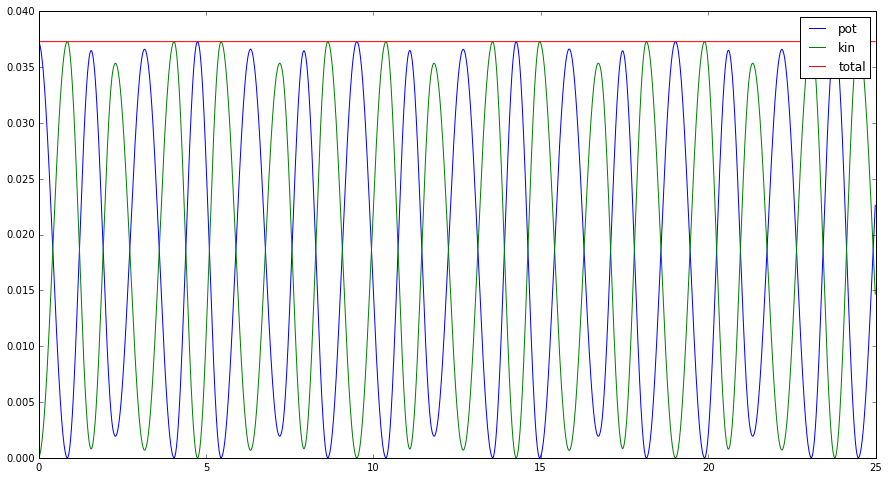

In [48]:
py.subplots(figsize=(15,8))
py.plot(t,Pot,t,Kin,t,Pot+Kin)
py.legend(['pot','kin','total'])
py.show()
